# Week 2: An End-to-End Machine Learning System Development
<font color='#AC135A'>**Applied Machine Learning** - **Sheffield Hallam University**</font>


---

## Introduction
The task is for you to have a taste of developing a complete machine learning system from the beginning to the end. We will use open-source datasets for this week practice. In particular, we will explore the *iris dataset* which is a classic dataset in Machine Learning collacted by the botanist Edgar Anderson and made famous by the renowned statistician Ronald Fisher.

# <font color="#672146">Part I - The data</font>

### Loading the data

First we need to load the data and check important aspects like:
- Are there any missing or invalid values?
- Are they all in acceptable ranges?
- How are the labels encoded?


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris() # Loads a dictionary

feature_names = iris.feature_names
target_names = iris.target_names
print(f"Target names: {iris.target_names}")
print(f"Feature names: {iris.feature_names}")
#print(iris.DESCR)

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(df.isnull().sum()) # Missing values
# Show the first few rows
print(df.sample(10))

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
44                 5.1               3.8                1.9               0.4   
132                6.4               2.8                5.6               2.2   
2                  4.7               3.2                1.3               0.2   
11                 4.8               3.4                1.6               0.2   
59                 5.2               2.7                3.9               1.4   
9                  4.9               3.1                1.5               0.1   
60                 5.0               2.0                3.5               1.0   
73                 6.1               2.8             

> *Exercise 1.1:* Replace the target encodings by the target names in the table.

> *Exercise 1.2:* Generate the summary statistics on your own. Plot the class distribution using a bar plot.

### Features and feature space

Now we can take a closer look to the features in our dataset. Let's start by plotting the histograms an explore the data distribution:

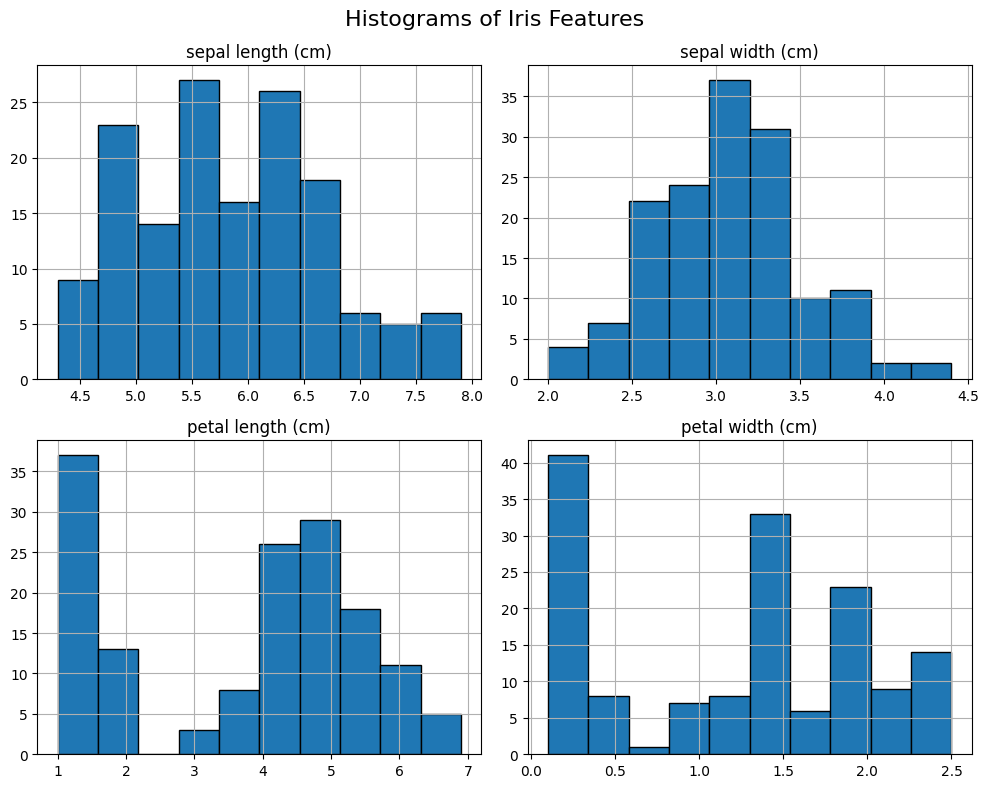

In [2]:
import matplotlib.pyplot as plt
df[iris.feature_names].hist(bins=10,
                            figsize=(10, 8),
                            edgecolor='black')
plt.suptitle("Histograms of Iris Features", fontsize=16)
plt.tight_layout()
plt.show()

We can also start exploring the relationships between different features by using scatter plots:

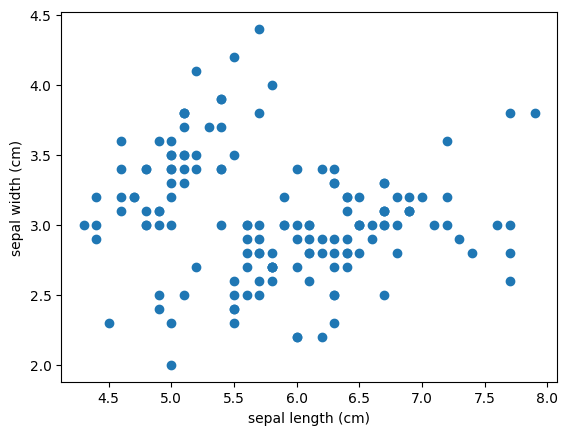

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(df['sepal length (cm)'], df['sepal width (cm)'], 'o')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

plt.show()

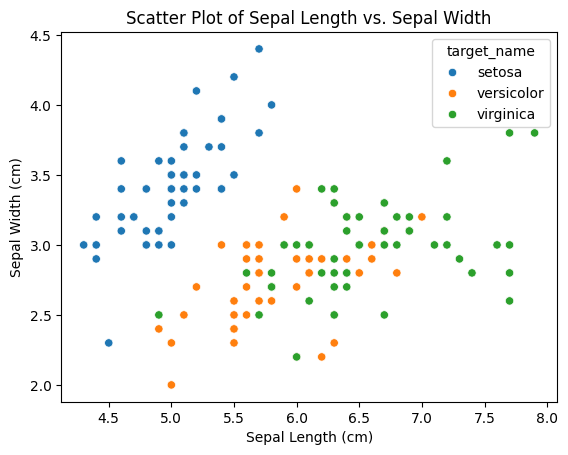

In [4]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target_name')
plt.title("Scatter Plot of Sepal Length vs. Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Of course it would be more useful if we could check the information about all the feature at the same time!

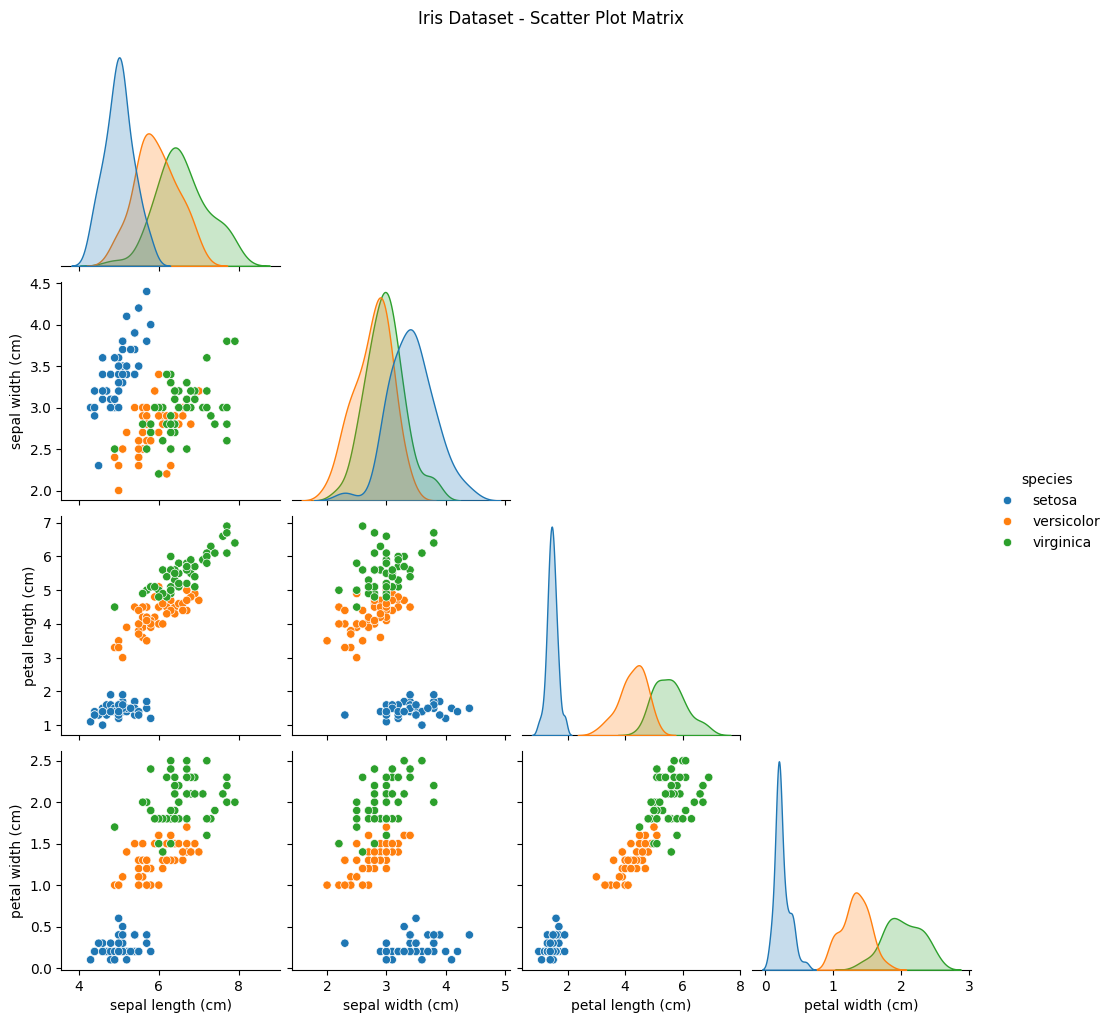

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df['species'] = pd.Categorical.from_codes(iris.target,
                                          iris.target_names)

# Pairplot (scatterplot matrix)
sns.pairplot(df.drop(columns=['target']),
             hue='species', corner=True)
plt.suptitle("Iris Dataset - Scatter Plot Matrix", y=1.02)
plt.show()


We can summarise this information using the correlation matrix:

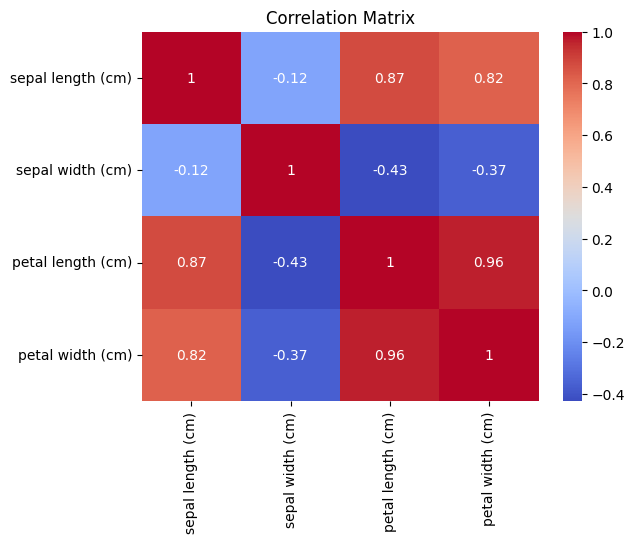

In [6]:
corr = df.drop(columns=['target', 'target_name', 'species']).corr() # correlation

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Finally, it is worth taking another look at the feature histograms, but this time separated by the labels. What do you see?

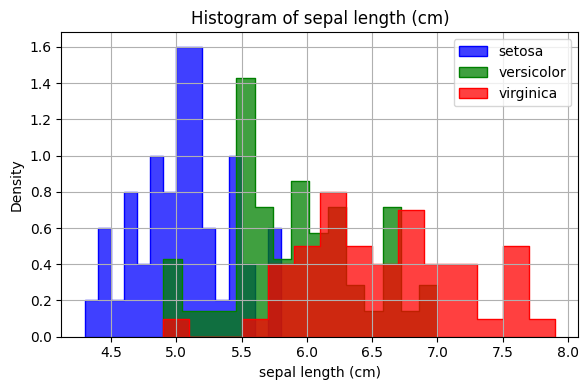

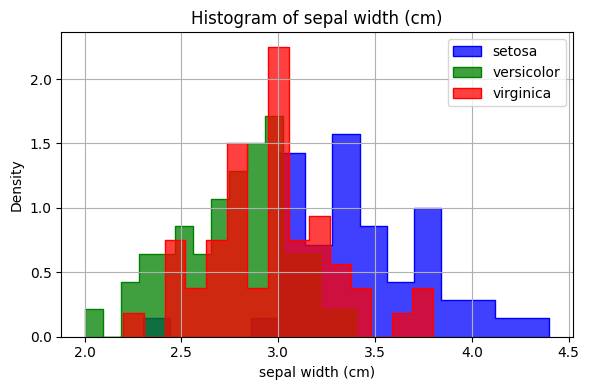

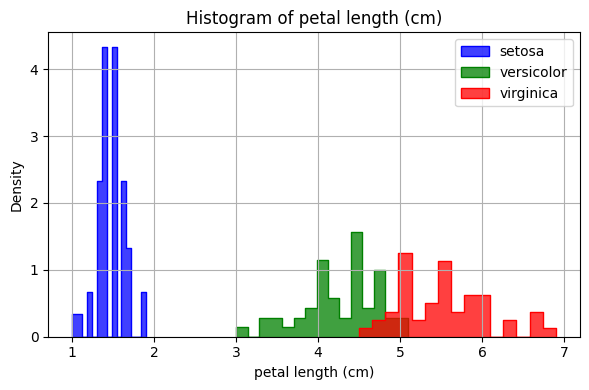

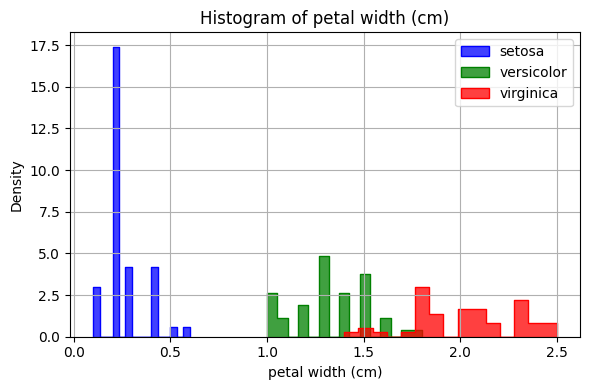

In [7]:
colors = ['blue', 'green', 'red']

for feature in feature_names:
    plt.figure(figsize=(6, 4))
    for species, color in zip(target_names, colors):
        subset = df[df['target_name'] == species]
        sns.histplot(subset[feature],
                     kde=False,
                     label=species,
                     color=color,
                     stat='density',
                     bins=15, element="step")

    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


> *Exercise 1.3*: Compute the mean, variance, correlation coefficient for individual features.

We can also visualise important summary information about the distribution using box-plots. What information can you see?

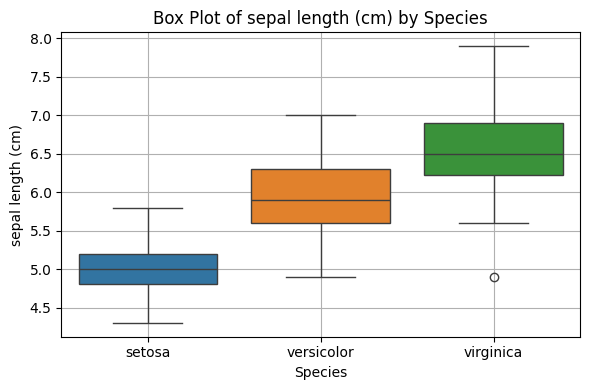

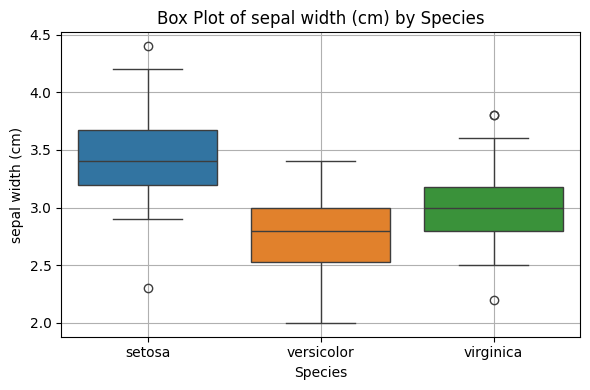

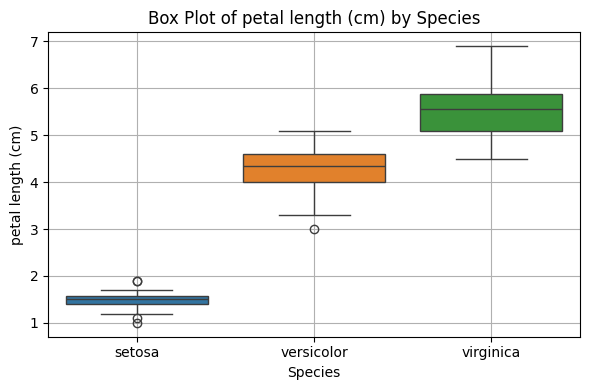

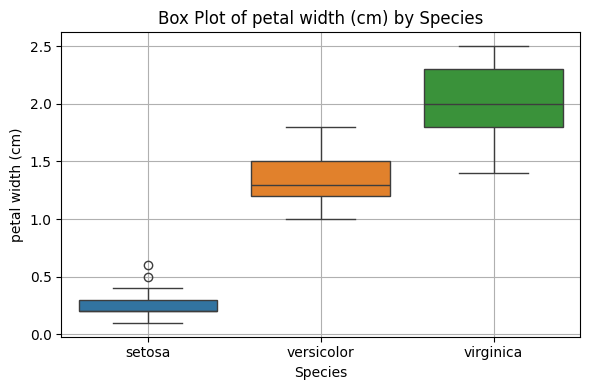

In [8]:
# Define color palette for species
colors = ['blue', 'green', 'red']

# Create one box plot per feature
for feature in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target_name', y=feature,
                data=df,
                hue = 'target_name',
                legend=False)
    plt.title(f'Box Plot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# <font color="#672146">Part II: The model</font>

We will use the K-Nearest-Neighbours (KNN) for this task. It is our first classifier and it's easy to understand. It's use in this task will reveal the shared notation we will use for other classifiers in this module.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Split the DataFrame into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

# Separate features and target for training and testing
X_train_df = train_df[feature_names]
y_train_df = train_df['target']
X_test_df = test_df[feature_names]
y_test_df = test_df['target']


> *Exercise 2.1*: Plot the histograms of the train and test sets, do they look similar?

Now the training of the classifier is straightforward:

In [10]:
# Train the KNN model
knn_df = KNeighborsClassifier(n_neighbors=3)
knn_df.fit(X_train_df, y_train_df)

# Make a prediction on the first test sample using the DataFrame
sample_df = X_test_df.iloc[0:1]
predicted_class_df = knn_df.predict(sample_df)[0]
actual_class_df = y_test_df.iloc[0]

print("Predicted Class: ", target_names[predicted_class_df])
print("Actual Class: ", target_names[actual_class_df])

Predicted Class:  virginica
Actual Class:  virginica


To assess the performance of our classifier, we start by computing the accuracy score:

In [11]:
from sklearn.metrics import accuracy_score

y_pred_df = knn_df.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred_df)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


> *Exercise 2.2*: Add noise to the data, how does the accuracy changes?

We can also compute the confusion matrix as seen in the lecture:

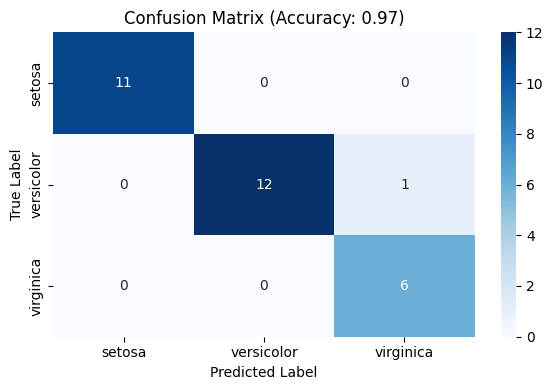

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_df, y_pred_df)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.tight_layout()
plt.show()

Finally, we can get a report-style summary of the performance of our model:

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test_df, y_pred_df, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



##  <font color="#672146">Part III: Improving the model's performace</font>

Now, you will try to improve the model's performance by implementing some commonly used techniques.


> *Exercise 2.3 Feature scaling*: KNN is sensitive to the scale of features because it uses distance metrics. Study the effect of scaling in the different features of the dataset.

To do so, apply StandardScaler or MinMaxScaler from sklearn.preprocessing. For example:

```
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)
```
Plot the original features and the scaled ones. Retrain the knn classifier with different scalings. Does performance improve?





> *Exercise 2.4 Hyper-parameter search*: Try to answer the following question: What is the best number of neighbours $k$.

To do so, use the function:

```
scores = cross_val_score(knn, X, y, cv=5)
```

Read the documentation, import the necessary functions, and repeat the cross validation for different values of $k$. What is the best? Why is cross-validation important?



> *Exercise 2.4 Using different metrics*: Distance choice affects how "closeness" is defined. Study the effect of different distance measures on the performance.

To do so, ry 'manhattan', 'minkowski', or 'cosine' distances. Show the confusion matrix for each choice.

Example:


```
KNeighborsClassifier(n_neighbors=5, metric='manhattan')
```



> *Exercise 2.5 Feature selection*: Remove one feature at a time. Does performance improve? Try using only two highly correlated features.